## О чем речь

- думаю что данные with crash искуственно изменены,не годны для расчета корреляций
- Здесь рассматривались данные с файлов without crash, объединяются два файла 00086Е и общие данные с 0008В9 для установки PV18
- временной ряд разбил по минутам, брал средние значения датчиков в минуту
- результат = таблица, где каждый датчик с какими датчиками максимально коррелиррует в прямую и обратную сторону

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Функции 

In [2]:
def minutes(data): # группировка по минутам
    minutes = []
    for i in range(len(data)):
        minute = data.time[i][:-3]
        minutes.append(minute)
    data['minutes'] = minutes
    data = data.groupby(['minutes'], as_index=False).mean()
    return data

In [3]:
def corr(df,method): # корреляции
    p = df.corr(method = method)
    p[p == 1] = 0
    return p

In [4]:
def find_max(data): # макс. корреляция двух датчиков
    values = []
    i = 0
    for each in data.columns:
        array = np.array(data[each])
        max_el = np.amax(array)
        result = np.where(array == max_el)
        values.append([data.columns[i],data.columns[result[0][0]],max_el])  
        i += 1
    return values

def find_min(data): # мкс. отрицат. значение кореляции 2 датчиков
    values = []
    i = 0
    for each in data.columns:
        array = np.array(data[each])
        min_el = np.amin(array)
        result = np.where(array == min_el)
        values.append([data.columns[i],data.columns[result[0][0]],min_el])  
        i += 1
    return values

In [5]:
def corr_table(data): # таблица максимальных корр.
    corr = pd.DataFrame(find_max(data),columns=['Sensor','Sensor max','Value max'])
    min_corr = pd.DataFrame(find_min(data),columns=['Sensor','Sensor min','Value min'])
    corr['Sensor min'] = min_corr['Sensor min']
    corr['Value min'] = min_corr['Value min']
    return corr

In [56]:
def plotting(data,variables): # построение графиков
    sns.set()
    sns_plot = sns.pairplot(data[data.columns] ,vars = variables)
    sns_plot.savefig("output17.png")
    return sns_plot

# Without crash

# Установка ПВ-18 

##  Модуль № 00086Е

1. Температура наружного воздуха (ТЕ 1 )
2. Температура вытяжного воздуха (ТЕ 2 )
3. Температура приточного воздуха (ТЕ 3 )
4. Температура до рекуператора (ТЕ 4 )
5. Температура после рекуператора (ТЕ 5 )
6. Температура обратного теплоносителя (ТЕ 6 )
7. Освещённость в вент.камере 
8. Давление в обратном трубопроводе
9. Давление в прямом трубопроводе 

In [6]:
cols = ['time','id','Тем_нар','Тем_вытяж','Тем_прит','Тем_до_рек','Тем_пос_рек','Тем_обр_тепл','O','Дав_обр_труб','Дав_прям_труб']
data18 = pd.read_csv('data-0008B0-PV18.csv', names = cols, header = 0) 

In [7]:
data18.head(3)

time      id  Тем_нар  Тем_вытяж  Тем_прит  Тем_до_рек  \
0  2019-03-04 12:31:56  0008B0      502        713       708         574   
1  2019-03-04 12:31:18  0008B0      502        710       705         574   
2  2019-03-04 12:31:11  0008B0      502        716       708         574   

   Тем_пос_рек  Тем_обр_тепл  O  Дав_обр_труб  Дав_прям_труб  
0          599           752  0          2077           2246  
1          599           752  0          2074           2241  
2          599           752  0          2068           2238

### Группировка данных по минутам

In [8]:
df1 = minutes(data18)
df1.to_csv('PV18_in_minutes.csv')
df1

minutes  Тем_нар  Тем_вытяж    Тем_прит  Тем_до_рек  \
0      2019-01-17 13:58    477.0     710.00  708.000000  572.000000   
1      2019-01-17 14:06    480.0     710.00  705.000000  569.000000   
2      2019-01-17 14:09    480.0     710.00  702.000000  572.000000   
3      2019-01-17 14:11    480.0     710.00  702.000000  572.000000   
4      2019-01-17 14:14    483.0     710.00  708.000000  572.000000   
...                 ...      ...        ...         ...         ...   
21295  2019-03-04 12:27    502.0     715.00  706.000000  574.000000   
21296  2019-03-04 12:28    502.0     714.20  705.600000  574.600000   
21297  2019-03-04 12:29    502.0     713.00  704.571429  573.714286   
21298  2019-03-04 12:30    500.5     713.75  707.250000  574.000000   
21299  2019-03-04 12:31    502.0     713.00  707.000000  574.000000   

       Тем_пос_рек  Тем_обр_тепл    O  Дав_обр_труб  Дав_прям_труб  
0       599.000000         763.0  0.0   1782.000000    1943.000000  
1       599.000000         749.0  0.0   1785.000000    1946.000000  
2       597.000000         752.0  0.0   1788.000000    1949.000000  
3       599.000000         755.0  0.0   1785.000000    1946.000000  
4       599.000000         758.0  0.0   1785.000000    1946.000000  
...            ...           ...  ...           ...            ...  
21295   599.000000         752.0  0.0   2070.000000    2236.000000  
21296   599.600000         752.0  0.0   2072.800000    2239.600000  
21297   598.857143         752.0  0.0   2075.285714    2241.857143  
21298   599.250000         752.0  0.0   2073.250000    2237.750000  
21299   599.000000         752.0  0.0   2073.000000    2241.666667  

[21300 rows x 10 columns]

## Модуль № 0008В9

1. Ввод питания фаза А  (100А)
2. Ввод питания фаза В  (100А)
3. Ввод питания фаза С (100А)
4. ПВ-17 фаза  А (50А) не нужно
5. ПВ-17 фаза  В (50А) не нужно
6. ПВ-17 фаза  С (50А) не нужно
7. ПВ-18 фаза  А (50А) 
8. ПВ-18 фаза  В (50А) 
9. ПВ-18 фаза  С (50А)


In [9]:
cols1 = ['time','id','Общ_ВводА','Общ_ВводB','Общ_ВводC','Ввод_17_А','Ввод_17_B','Ввод_17_C','Ввод_18_А','Ввод_18_B','Ввод_18_C']
data1718 = pd.read_csv('data-0008B9.csv', names = cols1, header = 0) 
data1718.drop(['Ввод_17_А','Ввод_17_B','Ввод_17_C','id'], axis = 1,inplace = True)
data1718.head()

time  Общ_ВводА  Общ_ВводB  Общ_ВводC  Ввод_18_А  Ввод_18_B  \
0  2019-03-01 11:42:09      24107      23924      23863         50       2211   
1  2019-03-01 11:41:51      24077      23985      23863         50       2195   
2  2019-03-01 11:41:33      24107      23924      23863         50       2195   
3  2019-03-01 11:41:14      24077      23955      23893         50       2195   
4  2019-03-01 11:40:56      24077      23924      23863         50       2226   

   Ввод_18_C  
0       2180  
1       2180  
2       2180  
3       2195  
4       2211

In [10]:
df2 = minutes(data1718)
df2.to_csv('PV1718_in_minutes.csv')
df2

minutes     Общ_ВводА     Общ_ВводB     Общ_ВводC  Ввод_18_А  \
0      2019-02-08 02:49  24107.500000  23924.000000  23878.000000       50.0   
1      2019-02-08 02:50  24107.000000  23944.666667  23883.000000       50.0   
2      2019-02-08 02:51  24127.666667  23944.666667  23852.333333       50.0   
3      2019-02-08 02:52  24099.500000  23924.000000  23863.000000       50.0   
4      2019-02-08 02:53  24097.000000  23934.333333  23863.000000       50.0   
...                 ...           ...           ...           ...        ...   
30744  2019-03-01 11:38  24107.000000  23924.000000  23862.666667       50.0   
30745  2019-03-01 11:39  24117.333333  23964.666667  23852.666667       50.0   
30746  2019-03-01 11:40  24107.250000  23954.750000  23862.750000       50.0   
30747  2019-03-01 11:41  24087.000000  23954.666667  23873.000000       50.0   
30748  2019-03-01 11:42  24107.000000  23924.000000  23863.000000       50.0   

         Ввод_18_B  Ввод_18_C  
0       629.000000      644.0  
1       629.000000      644.0  
2       629.000000      644.0  
3       629.000000      644.0  
4       629.000000      644.0  
...            ...        ...  
30744  2170.000000     2175.0  
30745  2195.333333     2170.0  
30746  2218.500000     2199.0  
30747  2195.000000     2185.0  
30748  2211.000000     2180.0  

[30749 rows x 7 columns]

## Joining

In [11]:
df1 = pd.read_csv('PV18_in_minutes.csv',index_col='Unnamed: 0') 
df2 = pd.read_csv('PV1718_in_minutes.csv',index_col='Unnamed: 0') 
df = pd.merge(df1,df2)
df

minutes  Тем_нар  Тем_вытяж  Тем_прит  Тем_до_рек  \
0      2019-02-08 03:31    508.0      558.0     724.0       558.0   
1      2019-02-08 03:47    508.0      558.0     722.0       555.0   
2      2019-02-08 03:48    508.0      563.0     724.0       555.0   
3      2019-02-08 04:56    510.0      583.0     722.0       560.0   
4      2019-02-08 04:57    510.0      577.0     722.0       558.0   
...                 ...      ...        ...       ...         ...   
16070  2019-03-01 11:19    533.0      716.0     705.0       594.0   
16071  2019-03-01 11:20    532.0      719.0     706.0       596.0   
16072  2019-03-01 11:21    531.0      719.0     704.0       596.0   
16073  2019-03-01 11:27    535.0      719.0     708.0       597.0   
16074  2019-03-01 11:35    535.0      716.0     710.0       597.0   

       Тем_пос_рек  Тем_обр_тепл    O  Дав_обр_труб  Дав_прям_труб  \
0            513.0    755.000000  0.0        1771.0    1902.000000   
1            513.0    755.000000  0.0        1771.0    1907.000000   
2            513.0    755.000000  0.0        1774.0    1902.000000   
3            510.0    758.000000  0.0        1757.0    1885.000000   
4            510.0    758.000000  0.0        1743.0    1874.000000   
...            ...           ...  ...           ...            ...   
16070        616.0    733.000000  0.0        1730.0    1866.000000   
16071        617.0    735.000000  0.0        1736.0    1870.000000   
16072        617.0    734.333333  0.0        1732.0    1870.333333   
16073        619.0    738.000000  0.0        1738.0    1871.000000   
16074        616.0    741.000000  0.0        1752.0    1885.000000   

          Общ_ВводА     Общ_ВводB     Общ_ВводC  Ввод_18_А    Ввод_18_B  \
0      24036.000000  23873.000000  23802.000000       50.0   629.000000   
1      23975.000000  23812.000000  23761.000000       50.0   624.000000   
2      23954.750000  23802.000000  23755.750000       50.0   617.750000   
3      23832.250000  23680.000000  23603.250000       50.0   629.000000   
4      23812.000000  23659.333333  23608.666667       50.0   614.000000   
...             ...           ...           ...        ...          ...   
16070  24056.333333  23924.000000  23832.000000       50.0  2190.333333   
16071  24076.666667  23924.000000  23842.333333       50.0  2190.000000   
16072  24053.750000  23947.250000  23855.250000       50.0  2207.000000   
16073  24077.000000  23965.000000  23862.666667       50.0  2195.000000   
16074  24077.000000  23955.000000  23852.333333       50.0  2190.000000   

         Ввод_18_C  
0       644.000000  
1       644.000000  
2       644.000000  
3       644.000000  
4       644.000000  
...            ...  
16070  2179.666667  
16071  2210.666667  
16072  2222.250000  
16073  2195.333333  
16074  2190.333333  

[16075 rows x 16 columns]

In [51]:
df18 = df.drop(['minutes','O'],axis = 1)

In [52]:
print('Первый датасет =',len(data18),'; После groupby = ', len(df1))
print('Второй датасет =',len(data1718),'; После groupby = ', len(df2))
print('После join =', len(df))

Первый датасет = 100000 ; После groupby =  21300
Второй датасет = 100000 ; После groupby =  30749
После join = 16075


In [53]:
pearson18 = corr(df18,'pearson')
pearson18

Тем_нар  Тем_вытяж  Тем_прит  Тем_до_рек  Тем_пос_рек  \
Тем_нар        0.000000   0.054658  0.202084    0.831930     0.332537   
Тем_вытяж      0.054658   0.000000 -0.337026    0.579890     0.939371   
Тем_прит       0.202084  -0.337026  0.000000   -0.019081    -0.277081   
Тем_до_рек     0.831930   0.579890 -0.019081    0.000000     0.781917   
Тем_пос_рек    0.332537   0.939371 -0.277081    0.781917     0.000000   
Тем_обр_тепл  -0.219904  -0.012343  0.736303   -0.170227    -0.115718   
Дав_обр_труб   0.032812  -0.078022 -0.106286   -0.031816    -0.068444   
Дав_прям_труб  0.042375  -0.092713 -0.084338   -0.034948    -0.081099   
Общ_ВводА      0.155444  -0.535780  0.328597   -0.155468    -0.453621   
Общ_ВводB      0.173131  -0.520883  0.328995   -0.132496    -0.433920   
Общ_ВводC      0.161056  -0.558106  0.326733   -0.163065    -0.476994   
Ввод_18_А     -0.003292   0.000481  0.000023   -0.002007    -0.000280   
Ввод_18_B     -0.175629   0.886933 -0.417566    0.331871     0.805178   
Ввод_18_C     -0.171042   0.879223 -0.419262    0.332123     0.798613   

               Тем_обр_тепл  Дав_обр_труб  Дав_прям_труб  Общ_ВводА  \
Тем_нар           -0.219904      0.032812       0.042375   0.155444   
Тем_вытяж         -0.012343     -0.078022      -0.092713  -0.535780   
Тем_прит           0.736303     -0.106286      -0.084338   0.328597   
Тем_до_рек        -0.170227     -0.031816      -0.034948  -0.155468   
Тем_пос_рек       -0.115718     -0.068444      -0.081099  -0.453621   
Тем_обр_тепл       0.000000     -0.117110      -0.099031   0.000991   
Дав_обр_труб      -0.117110      0.000000       0.987874  -0.004590   
Дав_прям_труб     -0.099031      0.987874       0.000000   0.015429   
Общ_ВводА          0.000991     -0.004590       0.015429   0.000000   
Общ_ВводB         -0.003104     -0.010431       0.009006   0.990899   
Общ_ВводC         -0.011832     -0.007029       0.012156   0.988396   
Ввод_18_А         -0.003475     -0.002803      -0.003609   0.003418   
Ввод_18_B          0.001875     -0.128217      -0.142338  -0.646025   
Ввод_18_C         -0.001547     -0.141179      -0.156494  -0.656928   

               Общ_ВводB  Общ_ВводC  Ввод_18_А  Ввод_18_B  Ввод_18_C  
Тем_нар         0.173131   0.161056  -0.003292  -0.175629  -0.171042  
Тем_вытяж      -0.520883  -0.558106   0.000481   0.886933   0.879223  
Тем_прит        0.328995   0.326733   0.000023  -0.417566  -0.419262  
Тем_до_рек     -0.132496  -0.163065  -0.002007   0.331871   0.332123  
Тем_пос_рек    -0.433920  -0.476994  -0.000280   0.805178   0.798613  
Тем_обр_тепл   -0.003104  -0.011832  -0.003475   0.001875  -0.001547  
Дав_обр_труб   -0.010431  -0.007029  -0.002803  -0.128217  -0.141179  
Дав_прям_труб   0.009006   0.012156  -0.003609  -0.142338  -0.156494  
Общ_ВводА       0.990899   0.988396   0.003418  -0.646025  -0.656928  
Общ_ВводB       0.000000   0.989134   0.003835  -0.636928  -0.646342  
Общ_ВводC       0.989134   0.000000   0.004422  -0.675848  -0.683721  
Ввод_18_А       0.003835   0.004422   0.000000  -0.003022  -0.003061  
Ввод_18_B      -0.636928  -0.675848  -0.003022   0.000000   0.998168  
Ввод_18_C      -0.646342  -0.683721  -0.003061   0.998168   0.000000

In [54]:
corr_table(pearson18)

Sensor     Sensor max  Value max     Sensor min  Value min
0         Тем_нар     Тем_до_рек   0.831930   Тем_обр_тепл  -0.219904
1       Тем_вытяж    Тем_пос_рек   0.939371      Общ_ВводC  -0.558106
2        Тем_прит   Тем_обр_тепл   0.736303      Ввод_18_C  -0.419262
3      Тем_до_рек        Тем_нар   0.831930   Тем_обр_тепл  -0.170227
4     Тем_пос_рек      Тем_вытяж   0.939371      Общ_ВводC  -0.476994
5    Тем_обр_тепл       Тем_прит   0.736303        Тем_нар  -0.219904
6    Дав_обр_труб  Дав_прям_труб   0.987874      Ввод_18_C  -0.141179
7   Дав_прям_труб   Дав_обр_труб   0.987874      Ввод_18_C  -0.156494
8       Общ_ВводА      Общ_ВводB   0.990899      Ввод_18_C  -0.656928
9       Общ_ВводB      Общ_ВводА   0.990899      Ввод_18_C  -0.646342
10      Общ_ВводC      Общ_ВводB   0.989134      Ввод_18_C  -0.683721
11      Ввод_18_А      Общ_ВводC   0.004422  Дав_прям_труб  -0.003609
12      Ввод_18_B      Ввод_18_C   0.998168      Общ_ВводC  -0.675848
13      Ввод_18_C      Ввод_18_B   0.998168      Общ_ВводC  -0.683721

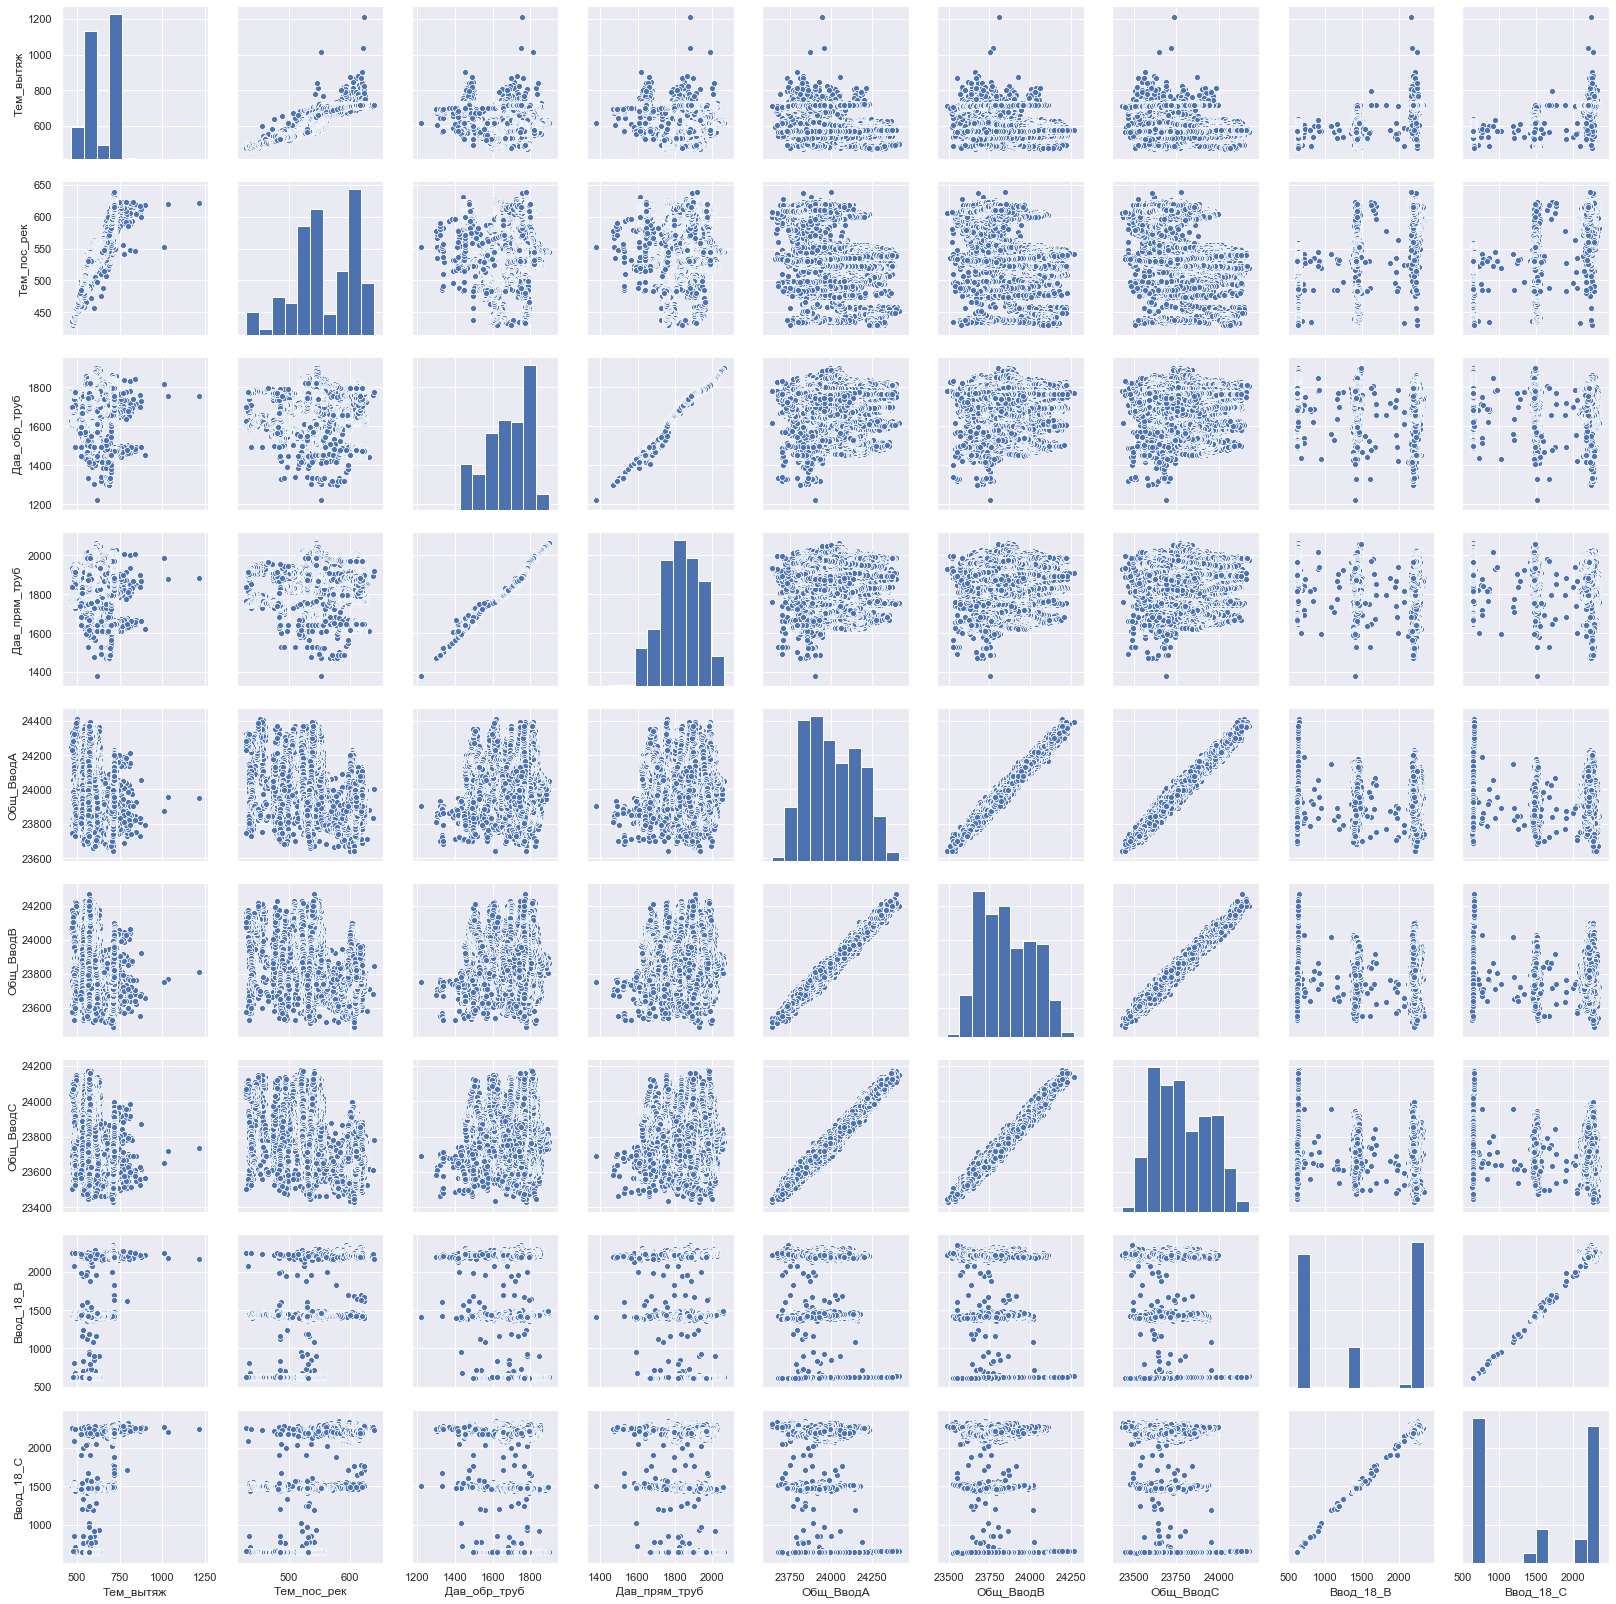

In [58]:
variables18 = ['Тем_вытяж','Тем_пос_рек','Дав_обр_труб','Дав_прям_труб','Общ_ВводА','Общ_ВводB','Общ_ВводC','Ввод_18_B','Ввод_18_C']
plot18 = plotting(df18,variables18)

In [60]:
plot18.savefig("output18.png")

# Установка ПВ-17 

## Модуль № 0008В0

1. Температура наружного воздуха (ТЕ 1)
2. Температура вытяжного воздуха (ТЕ 2)
3. Температура приточного воздуха (ТЕ 3)
4. Температура до рекуператора (ТЕ 4)
5. Температура после рекуператора (ТЕ 5)
6. Температура обратного теплоносителя (ТЕ 6)
7. Освещённость в вент.камере
8. Давление в обратном трубопроводе
9. Давление в прямом трубопроводе


In [21]:
cols = ['time','id','Тем_нар','Тем_вытяж','Тем_прит','Тем_до_рек','Тем_пос_рек','Тем_обр_тепл','O','Дав_обр_труб','Дав_прям_труб']
data17 = pd.read_csv('data-00086E-PV17.csv', names = cols, header = 0) 

In [22]:
df3 = minutes(data17)
df3

minutes     Тем_нар   Тем_вытяж    Тем_прит  Тем_до_рек  \
0      2019-02-08 06:01  505.000000  692.666667  720.666667      663.00   
1      2019-02-08 06:02  498.333333  700.333333  726.000000      663.00   
2      2019-02-08 06:03  509.750000  693.000000  714.500000      663.75   
3      2019-02-08 06:04  511.666667  694.000000  720.666667      663.00   
4      2019-02-08 06:05  503.000000  691.000000  718.000000      664.00   
...                 ...         ...         ...         ...         ...   
30562  2019-03-01 11:38  531.250000  702.000000  717.500000      680.75   
30563  2019-03-01 11:39  533.666667  703.000000  718.666667      680.00   
30564  2019-03-01 11:40  531.666667  708.666667  719.666667      680.00   
30565  2019-03-01 11:41  533.500000  703.500000  718.250000      680.75   
30566  2019-03-01 11:42  535.000000  702.000000  730.000000      680.00   

       Тем_пос_рек  Тем_обр_тепл    O  Дав_обр_труб  Дав_прям_труб  
0       583.333333         770.0  0.0   1759.333333    1959.000000  
1       589.000000         770.0  0.0   1763.000000    1962.000000  
2       591.750000         770.5  0.0   1763.750000    1963.000000  
3       599.333333         771.0  0.0   1760.000000    1961.000000  
4       586.333333         770.0  0.0   1767.333333    1966.333333  
...            ...           ...  ...           ...            ...  
30562   607.000000         752.0  0.0   1748.250000    1949.000000  
30563   612.333333         752.0  0.0   1750.000000    1950.000000  
30564   602.000000         752.0  0.0   1748.000000    1950.000000  
30565   611.000000         752.0  0.0   1749.000000    1952.000000  
30566   602.000000         752.0  0.0   1749.000000    1952.000000  

[30567 rows x 10 columns]

In [23]:
df3.drop('O',axis =1, inplace = True)
df3.to_csv('PV17_in_minutes.csv')
df3

minutes     Тем_нар   Тем_вытяж    Тем_прит  Тем_до_рек  \
0      2019-02-08 06:01  505.000000  692.666667  720.666667      663.00   
1      2019-02-08 06:02  498.333333  700.333333  726.000000      663.00   
2      2019-02-08 06:03  509.750000  693.000000  714.500000      663.75   
3      2019-02-08 06:04  511.666667  694.000000  720.666667      663.00   
4      2019-02-08 06:05  503.000000  691.000000  718.000000      664.00   
...                 ...         ...         ...         ...         ...   
30562  2019-03-01 11:38  531.250000  702.000000  717.500000      680.75   
30563  2019-03-01 11:39  533.666667  703.000000  718.666667      680.00   
30564  2019-03-01 11:40  531.666667  708.666667  719.666667      680.00   
30565  2019-03-01 11:41  533.500000  703.500000  718.250000      680.75   
30566  2019-03-01 11:42  535.000000  702.000000  730.000000      680.00   

       Тем_пос_рек  Тем_обр_тепл  Дав_обр_труб  Дав_прям_труб  
0       583.333333         770.0   1759.333333    1959.000000  
1       589.000000         770.0   1763.000000    1962.000000  
2       591.750000         770.5   1763.750000    1963.000000  
3       599.333333         771.0   1760.000000    1961.000000  
4       586.333333         770.0   1767.333333    1966.333333  
...            ...           ...           ...            ...  
30562   607.000000         752.0   1748.250000    1949.000000  
30563   612.333333         752.0   1750.000000    1950.000000  
30564   602.000000         752.0   1748.000000    1950.000000  
30565   611.000000         752.0   1749.000000    1952.000000  
30566   602.000000         752.0   1749.000000    1952.000000  

[30567 rows x 9 columns]

## Модуль № 0008В9

In [24]:
cols1 = ['time','id','Общ_ВводА','Общ_ВводB','Общ_ВводC','Ввод_17_А','Ввод_17_B','Ввод_17_C','Ввод_18_А','Ввод_18_B','Ввод_18_C']
data1718_ = pd.read_csv('data-0008B9.csv', names = cols1, header = 0) 
data1718_.drop(['Ввод_18_А','Ввод_18_B','Ввод_18_C','id'], axis = 1,inplace = True)
data1718_.head()

time  Общ_ВводА  Общ_ВводB  Общ_ВводC  Ввод_17_А  Ввод_17_B  \
0  2019-03-01 11:42:09      24107      23924      23863      42081      40677   
1  2019-03-01 11:41:51      24077      23985      23863      42111      40616   
2  2019-03-01 11:41:33      24107      23924      23863      42081      40677   
3  2019-03-01 11:41:14      24077      23955      23893      42081      40647   
4  2019-03-01 11:40:56      24077      23924      23863      42050      40616   

   Ввод_17_C  
0      41745  
1      41806  
2      41745  
3      41806  
4      41776

In [25]:
df4 = minutes(data1718_)
df4

minutes     Общ_ВводА     Общ_ВводB     Общ_ВводC  \
0      2019-02-08 02:49  24107.500000  23924.000000  23878.000000   
1      2019-02-08 02:50  24107.000000  23944.666667  23883.000000   
2      2019-02-08 02:51  24127.666667  23944.666667  23852.333333   
3      2019-02-08 02:52  24099.500000  23924.000000  23863.000000   
4      2019-02-08 02:53  24097.000000  23934.333333  23863.000000   
...                 ...           ...           ...           ...   
30744  2019-03-01 11:38  24107.000000  23924.000000  23862.666667   
30745  2019-03-01 11:39  24117.333333  23964.666667  23852.666667   
30746  2019-03-01 11:40  24107.250000  23954.750000  23862.750000   
30747  2019-03-01 11:41  24087.000000  23954.666667  23873.000000   
30748  2019-03-01 11:42  24107.000000  23924.000000  23863.000000   

          Ввод_17_А     Ввод_17_B     Ввод_17_C  
0      42080.500000  40677.000000  41775.500000  
1      42101.000000  40677.333333  41796.000000  
2      42111.333333  40657.000000  41755.666667  
3      42050.250000  40661.750000  41752.750000  
4      42070.666667  40677.333333  41745.333333  
...             ...           ...           ...  
30744  42070.333333  40667.000000  41745.333333  
30745  42111.333333  40657.000000  41786.000000  
30746  42119.000000  40639.000000  41775.750000  
30747  42091.000000  40646.666667  41785.666667  
30748  42081.000000  40677.000000  41745.000000  

[30749 rows x 7 columns]

## Joining

In [44]:
df17 = pd.merge(df3,df4)
df17

minutes     Тем_нар   Тем_вытяж    Тем_прит  Тем_до_рек  \
0      2019-02-08 06:01  505.000000  692.666667  720.666667      663.00   
1      2019-02-08 06:02  498.333333  700.333333  726.000000      663.00   
2      2019-02-08 06:03  509.750000  693.000000  714.500000      663.75   
3      2019-02-08 06:04  511.666667  694.000000  720.666667      663.00   
4      2019-02-08 06:05  503.000000  691.000000  718.000000      664.00   
...                 ...         ...         ...         ...         ...   
30552  2019-03-01 11:38  531.250000  702.000000  717.500000      680.75   
30553  2019-03-01 11:39  533.666667  703.000000  718.666667      680.00   
30554  2019-03-01 11:40  531.666667  708.666667  719.666667      680.00   
30555  2019-03-01 11:41  533.500000  703.500000  718.250000      680.75   
30556  2019-03-01 11:42  535.000000  702.000000  730.000000      680.00   

       Тем_пос_рек  Тем_обр_тепл  Дав_обр_труб  Дав_прям_труб     Общ_ВводА  \
0       583.333333         770.0   1759.333333    1959.000000  23839.750000   
1       589.000000         770.0   1763.000000    1962.000000  23842.333333   
2       591.750000         770.5   1763.750000    1963.000000  23873.000000   
3       599.333333         771.0   1760.000000    1961.000000  23863.000000   
4       586.333333         770.0   1767.333333    1966.333333  23832.000000   
...            ...           ...           ...            ...           ...   
30552   607.000000         752.0   1748.250000    1949.000000  24107.000000   
30553   612.333333         752.0   1750.000000    1950.000000  24117.333333   
30554   602.000000         752.0   1748.000000    1950.000000  24107.250000   
30555   611.000000         752.0   1749.000000    1952.000000  24087.000000   
30556   602.000000         752.0   1749.000000    1952.000000  24107.000000   

          Общ_ВводB     Общ_ВводC     Ввод_17_А     Ввод_17_B     Ввод_17_C  
0      23672.000000  23611.250000  41615.750000  40227.000000  41310.750000  
1      23710.333333  23618.666667  41643.666667  40219.333333  41359.000000  
2      23700.000000  23639.000000  41664.000000  40270.666667  41338.666667  
3      23680.000000  23608.333333  41653.666667  40249.666667  41328.333333  
4      23702.500000  23619.000000  41623.250000  40234.500000  41371.500000  
...             ...           ...           ...           ...           ...  
30552  23924.000000  23862.666667  42070.333333  40667.000000  41745.333333  
30553  23964.666667  23852.666667  42111.333333  40657.000000  41786.000000  
30554  23954.750000  23862.750000  42119.000000  40639.000000  41775.750000  
30555  23954.666667  23873.000000  42091.000000  40646.666667  41785.666667  
30556  23924.000000  23863.000000  42081.000000  40677.000000  41745.000000  

[30557 rows x 15 columns]

In [45]:
df17= df17.drop(['minutes'],axis = 1)

In [46]:
pearson17 = corr(df17,'pearson')
pearson17

Тем_нар  Тем_вытяж  Тем_прит  Тем_до_рек  Тем_пос_рек  \
Тем_нар        0.000000   0.051794  0.017145    0.314127     0.353301   
Тем_вытяж      0.051794   0.000000 -0.547741    0.948492     0.933279   
Тем_прит       0.017145  -0.547741  0.000000   -0.511776    -0.478060   
Тем_до_рек     0.314127   0.948492 -0.511776    0.000000     0.976248   
Тем_пос_рек    0.353301   0.933279 -0.478060    0.976248     0.000000   
Тем_обр_тепл  -0.257143  -0.404566  0.562150   -0.416309    -0.441646   
Дав_обр_труб  -0.045017  -0.024123 -0.028521   -0.043803    -0.039468   
Дав_прям_труб -0.040752  -0.008343 -0.032329   -0.026875    -0.023050   
Общ_ВводА      0.077498  -0.593015  0.386720   -0.545711    -0.538652   
Общ_ВводB      0.105939  -0.575724  0.389369   -0.521787    -0.515375   
Общ_ВводC      0.087060  -0.608242  0.390128   -0.557960    -0.552348   
Ввод_17_А      0.093993  -0.577455  0.384053   -0.527538    -0.521401   
Ввод_17_B      0.072855  -0.607013  0.391737   -0.559692    -0.552476   
Ввод_17_C      0.101869  -0.595705  0.391623   -0.541588    -0.535777   

               Тем_обр_тепл  Дав_обр_труб  Дав_прям_труб  Общ_ВводА  \
Тем_нар           -0.257143     -0.045017      -0.040752   0.077498   
Тем_вытяж         -0.404566     -0.024123      -0.008343  -0.593015   
Тем_прит           0.562150     -0.028521      -0.032329   0.386720   
Тем_до_рек        -0.416309     -0.043803      -0.026875  -0.545711   
Тем_пос_рек       -0.441646     -0.039468      -0.023050  -0.538652   
Тем_обр_тепл       0.000000     -0.003171      -0.009880   0.199771   
Дав_обр_труб      -0.003171      0.000000       0.993420   0.023025   
Дав_прям_труб     -0.009880      0.993420       0.000000   0.019574   
Общ_ВводА          0.199771      0.023025       0.019574   0.000000   
Общ_ВводB          0.186128      0.025138       0.022621   0.989250   
Общ_ВводC          0.197021      0.025485       0.022377   0.987901   
Ввод_17_А          0.192321      0.025959       0.022689   0.996106   
Ввод_17_B          0.201503      0.021919       0.018881   0.994442   
Ввод_17_C          0.191087      0.025487       0.022734   0.986464   

               Общ_ВводB  Общ_ВводC  Ввод_17_А  Ввод_17_B  Ввод_17_C  
Тем_нар         0.105939   0.087060   0.093993   0.072855   0.101869  
Тем_вытяж      -0.575724  -0.608242  -0.577455  -0.607013  -0.595705  
Тем_прит        0.389369   0.390128   0.384053   0.391737   0.391623  
Тем_до_рек     -0.521787  -0.557960  -0.527538  -0.559692  -0.541588  
Тем_пос_рек    -0.515375  -0.552348  -0.521401  -0.552476  -0.535777  
Тем_обр_тепл    0.186128   0.197021   0.192321   0.201503   0.191087  
Дав_обр_труб    0.025138   0.025485   0.025959   0.021919   0.025487  
Дав_прям_труб   0.022621   0.022377   0.022689   0.018881   0.022734  
Общ_ВводА       0.989250   0.987901   0.996106   0.994442   0.986464  
Общ_ВводB       0.000000   0.989366   0.995202   0.985919   0.995961  
Общ_ВводC       0.989366   0.000000   0.986571   0.994716   0.995518  
Ввод_17_А       0.995202   0.986571   0.000000   0.988620   0.989737  
Ввод_17_B       0.985919   0.994716   0.988620   0.000000   0.988321  
Ввод_17_C       0.995961   0.995518   0.989737   0.988321   0.000000

In [47]:
corr_table(pearson17)

Sensor     Sensor max  Value max    Sensor min  Value min
0         Тем_нар    Тем_пос_рек   0.353301  Тем_обр_тепл  -0.257143
1       Тем_вытяж     Тем_до_рек   0.948492     Общ_ВводC  -0.608242
2        Тем_прит   Тем_обр_тепл   0.562150     Тем_вытяж  -0.547741
3      Тем_до_рек    Тем_пос_рек   0.976248     Ввод_17_B  -0.559692
4     Тем_пос_рек     Тем_до_рек   0.976248     Ввод_17_B  -0.552476
5    Тем_обр_тепл       Тем_прит   0.562150   Тем_пос_рек  -0.441646
6    Дав_обр_труб  Дав_прям_труб   0.993420       Тем_нар  -0.045017
7   Дав_прям_труб   Дав_обр_труб   0.993420       Тем_нар  -0.040752
8       Общ_ВводА      Ввод_17_А   0.996106     Тем_вытяж  -0.593015
9       Общ_ВводB      Ввод_17_C   0.995961     Тем_вытяж  -0.575724
10      Общ_ВводC      Ввод_17_C   0.995518     Тем_вытяж  -0.608242
11      Ввод_17_А      Общ_ВводА   0.996106     Тем_вытяж  -0.577455
12      Ввод_17_B      Общ_ВводC   0.994716     Тем_вытяж  -0.607013
13      Ввод_17_C      Общ_ВводB   0.995961     Тем_вытяж  -0.595705

In [67]:
print('Первый датасет =',len(data17), '; После groupby = ',len(df3))
print('Второй датасет =',len(data1718_), '; После groupby = ',len(df4))
print('После join = ', len(df17))

Первый датасет = 100000 ; После groupby =  30567
Второй датасет = 100000 ; После groupby =  30749
После join =  30557


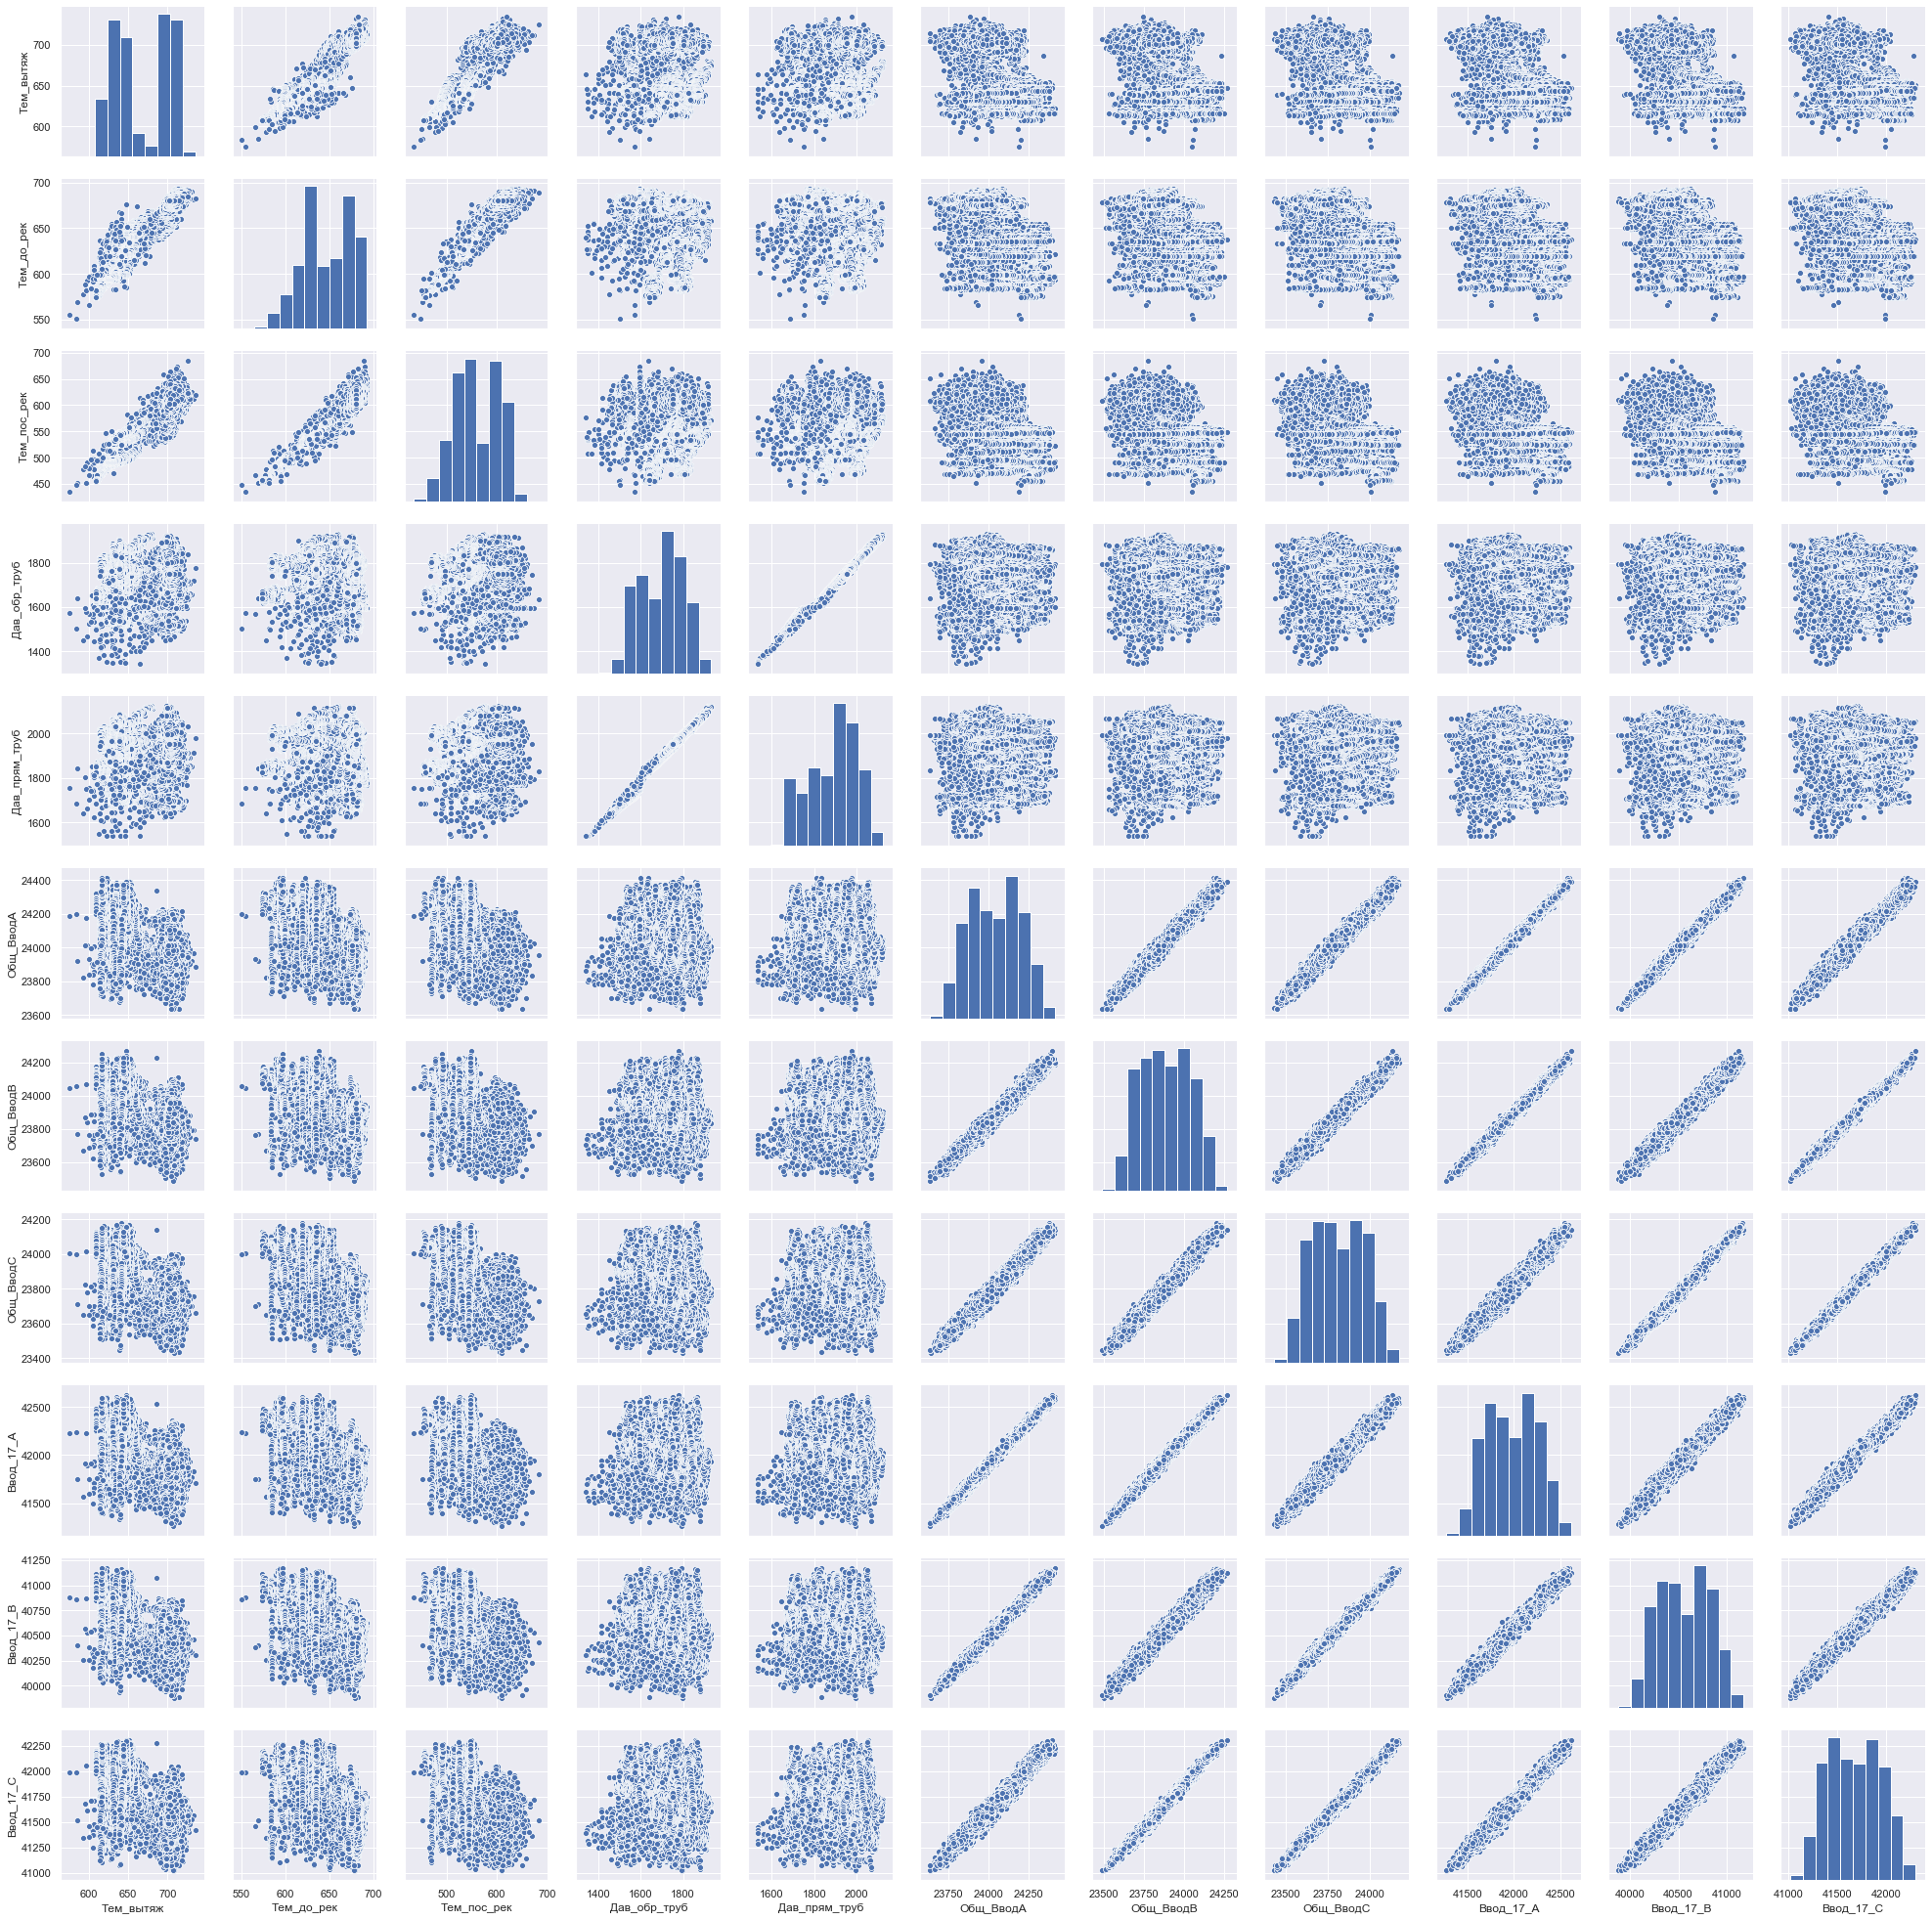

In [61]:
variables17 = ['Тем_вытяж','Тем_до_рек','Тем_пос_рек','Дав_обр_труб','Дав_прям_труб','Общ_ВводА','Общ_ВводB','Общ_ВводC','Ввод_17_А','Ввод_17_B','Ввод_17_C']
plot17 = plotting(df17,variables17)

In [62]:
plot17.savefig("output17.png")